In [14]:
import csv
from datetime import datetime, timedelta

def check_signal_loss():
    csv_file_path = 'D:/장우영/LOCALSEARCH/Ship_DA/DA/data/FAmerge_20230607_1147142.csv'  # Replace with the actual path to your CSV file
    insert_time_column = 'insert_time'  # Replace with the column name for INSERT_TIME
    sog_column = 'sog'  # Replace with the column name for sog

    with open(csv_file_path, 'r') as file:
        reader = csv.DictReader(file)
        signal_loss_threshold = timedelta(minutes=5)
        signal_loss_records = {}

        previous_time = {}
        counter = 0
        
        for row in reader:
            mmsi = row['mmsi']
            insert_time_str = row[insert_time_column]
            sog = float(row[sog_column]) if row[sog_column] else None
            
            if sog is None or sog < 3:  # Skip rows where sog is missing or less than 3
                continue
            
            if not insert_time_str:  # Skip rows with empty INSERT_TIME values
                continue

            try:
                insert_time = datetime.strptime(insert_time_str, "%Y-%m-%d %H:%M:%S")
            except ValueError:
                continue  # Skip rows with invalid INSERT_TIME format

            if mmsi in previous_time:
                time_diff = insert_time - previous_time[mmsi]
                if time_diff > signal_loss_threshold:
                    if mmsi in signal_loss_records:
                        signal_loss_records[mmsi][1] = insert_time
                    else:
                        signal_loss_records[mmsi] = [previous_time[mmsi], insert_time]
                        counter += 1
                        
            previous_time[mmsi] = insert_time

        if signal_loss_records:
            print("선박별 5분 이상 신호 손실 시간:")
            for mmsi, time_range in signal_loss_records.items():
                start_time = time_range[0].strftime("%Y-%m-%d %H:%M:%S")
                end_time = time_range[1].strftime("%Y-%m-%d %H:%M:%S")
                print(f"MMSI: {mmsi}, 시작 시간: {start_time}, 종료 시간: {end_time}")
        else:
            print("5분 이상 신호 손실이 발생한 선박이 없습니다.")

# Usage example
check_signal_loss()


선박별 5분 이상 신호 손실 시간:
MMSI: 440003510, 시작 시간: 2023-05-11 10:12:26, 종료 시간: 2023-05-11 11:18:08
MMSI: 440133310, 시작 시간: 2023-05-11 10:14:28, 종료 시간: 2023-05-11 13:53:18
MMSI: 440103910, 시작 시간: 2023-05-11 10:13:08, 종료 시간: 2023-05-11 11:11:29
MMSI: 440151680, 시작 시간: 2023-05-11 10:15:35, 종료 시간: 2023-05-11 10:20:56
MMSI: 441629000, 시작 시간: 2023-05-11 10:11:04, 종료 시간: 2023-05-11 10:21:46
MMSI: 211119000, 시작 시간: 2023-05-11 10:16:31, 종료 시간: 2023-05-11 14:44:39
MMSI: 441181000, 시작 시간: 2023-05-11 10:12:13, 종료 시간: 2023-05-11 13:15:13
MMSI: 440186320, 시작 시간: 2023-05-11 10:17:50, 종료 시간: 2023-05-11 17:20:14
MMSI: 440051540, 시작 시간: 2023-05-11 10:17:48, 종료 시간: 2023-05-11 10:24:38
MMSI: 440149410, 시작 시간: 2023-05-11 10:20:11, 종료 시간: 2023-05-11 16:30:31
MMSI: 440135830, 시작 시간: 2023-05-11 10:14:22, 종료 시간: 2023-05-11 15:48:22
MMSI: 440106690, 시작 시간: 2023-05-11 10:16:41, 종료 시간: 2023-05-11 13:33:42
MMSI: 372976000, 시작 시간: 2023-05-11 10:21:06, 종료 시간: 2023-05-11 16:40:25
MMSI: 440111210, 시작 시간: 2023-05-11 10:22:56,

In [ ]:
import csv
from datetime import datetime, timedelta

def calculate_total_loss_cases():
    csv_file_path = 'D:/장우영/LOCALSEARCH/Ship_DA/DA/data/FAmerge_20230607_1147142.csv'  # Replace with the actual path to your CSV file
    insert_time_column = 'insert_time'  # Replace with the column name for INSERT_TIME
    sog_column = 'sog'  # Replace with the column name for sog

    with open(csv_file_path, 'r') as file:
        reader = csv.DictReader(file)
        signal_loss_threshold = timedelta(minutes=5)
        signal_loss_records = {}

        for row in reader:
            mmsi = row['mmsi']
            insert_time_str = row[insert_time_column]
            sog = float(row[sog_column]) if row[sog_column] else None
            
            if sog is None or sog < 3:  # Skip rows where sog is missing or less than 3
                continue
            
            if not insert_time_str:  # Skip rows with empty INSERT_TIME values
                continue

            try:
                insert_time = datetime.strptime(insert_time_str, "%Y-%m-%d %H:%M:%S")
            except ValueError:
                continue  # Skip rows with invalid INSERT_TIME format

            if mmsi in signal_loss_records:
                time_diff = insert_time - signal_loss_records[mmsi]['end_time']
                if time_diff > signal_loss_threshold:
                    signal_loss_records[mmsi]['end_time'] = insert_time
                    signal_loss_records[mmsi]['count'] += 1
            else:
                signal_loss_records[mmsi] = {
                    'start_time': insert_time,
                    'end_time': insert_time,
                    'count': 1
                }
                
        if signal_loss_records:
            print("선박별 5분 이상 신호 손실 건수:")
            for mmsi, record in signal_loss_records.items():
                count = record['count']
                print(f"MMSI: {mmsi}, 손실 건수: {count}")
        else:
            print("5분 이상 신호 손실이 발생한 선박이 없습니다.")

# Usage example
calculate_total_loss_cases()


In [17]:
import csv
from datetime import datetime, timedelta

def check_signal_loss():
    csv_file_path = 'D:/장우영/LOCALSEARCH/Ship_DA/DA/data/FAmerge_20230607_1147142.csv'  # Replace with the actual path to your CSV file
    insert_time_column = 'insert_time'  # Replace with the column name for INSERT_TIME
    sog_column = 'sog'  # Replace with the column name for sog

    with open(csv_file_path, 'r') as file:
        reader = csv.DictReader(file)
        signal_loss_threshold = timedelta(minutes=5)
        signal_loss_records = {}

        previous_time = {}
        counter = 0
        
        for row in reader:
            mmsi = row['mmsi']
            insert_time_str = row[insert_time_column]
            sog = float(row[sog_column]) if row[sog_column] else None
            
            if sog is None or sog < 3:  # Skip rows where sog is missing or less than 3
                continue
            
            if not insert_time_str:  # Skip rows with empty INSERT_TIME values
                continue

            try:
                insert_time = datetime.strptime(insert_time_str, "%Y-%m-%d %H:%M:%S")
            except ValueError:
                continue  # Skip rows with invalid INSERT_TIME format

            if mmsi in previous_time:
                time_diff = insert_time - previous_time[mmsi]
                if time_diff > signal_loss_threshold:
                    if mmsi not in signal_loss_records:
                        signal_loss_records[mmsi] = {
                            'start_time': previous_time[mmsi],
                            'end_time': None,
                            'recovered_time': insert_time
                        }
                        counter += 1
                else:
                    signal_loss_records.pop(mmsi, None)
                        
            previous_time[mmsi] = insert_time

        if signal_loss_records:
            print("선박별 5분 이상 신호 손실 시간:")
            for mmsi, record in signal_loss_records.items():
                start_time = record['start_time'].strftime("%Y-%m-%d %H:%M:%S")
                #end_time = record['end_time'].strftime("%Y-%m-%d %H:%M:%S") if record['end_time'] else None
                recovered_time = record['recovered_time'].strftime("%Y-%m-%d %H:%M:%S")
                print(f"MMSI: {mmsi}, 시작 시간: {start_time},복구 시간: {recovered_time}")
        else:
            print("5분 이상 신호 손실이 발생한 선박이 없습니다.")

# Usage example
check_signal_loss()


선박별 5분 이상 신호 손실 시간:
MMSI: 441629000, 시작 시간: 2023-05-11 10:11:04,복구 시간: 2023-05-11 10:21:46
MMSI: 440051540, 시작 시간: 2023-05-11 10:17:48,복구 시간: 2023-05-11 10:24:38
MMSI: 440009810, 시작 시간: 2023-05-11 10:17:46,복구 시간: 2023-05-11 10:30:47
MMSI: 477153500, 시작 시간: 2023-05-11 10:26:48,복구 시간: 2023-05-11 10:32:28
MMSI: 374901000, 시작 시간: 2023-05-11 10:18:52,복구 시간: 2023-05-11 10:35:42
MMSI: 440147109, 시작 시간: 2023-05-11 10:22:54,복구 시간: 2023-05-11 10:46:54
MMSI: 273359970, 시작 시간: 2023-05-11 10:54:37,복구 시간: 2023-05-11 11:01:57
MMSI: 440709800, 시작 시간: 2023-05-11 11:16:44,복구 시간: 2023-05-11 11:22:05
MMSI: 440175230, 시작 시간: 2023-05-11 11:57:33,복구 시간: 2023-05-11 12:03:33
MMSI: 413479110, 시작 시간: 2023-05-11 10:20:32,복구 시간: 2023-05-11 12:15:33
MMSI: 440111760, 시작 시간: 2023-05-11 11:57:34,복구 시간: 2023-05-11 12:17:34
MMSI: 636014224, 시작 시간: 2023-05-11 11:48:35,복구 시간: 2023-05-11 12:31:00
MMSI: 440189340, 시작 시간: 2023-05-11 12:21:57,복구 시간: 2023-05-11 12:35:17
MMSI: 440120660, 시작 시간: 2023-05-11 12:32:25,복구 시간: 2023-0

선박별 10분 이상 신호 손실 시간:
MMSI: 441629000, 시작 시간: 2023-05-11 10:11:04, 복구 시간: 2023-05-11 10:21:46
MMSI: 440009810, 시작 시간: 2023-05-11 10:17:46, 복구 시간: 2023-05-11 10:30:47
MMSI: 374901000, 시작 시간: 2023-05-11 10:18:52, 복구 시간: 2023-05-11 10:35:42
MMSI: 440147109, 시작 시간: 2023-05-11 10:22:54, 복구 시간: 2023-05-11 10:46:54
MMSI: 413479110, 시작 시간: 2023-05-11 10:20:32, 복구 시간: 2023-05-11 12:15:33
MMSI: 440111760, 시작 시간: 2023-05-11 11:57:34, 복구 시간: 2023-05-11 12:17:34
MMSI: 636014224, 시작 시간: 2023-05-11 11:48:35, 복구 시간: 2023-05-11 12:31:00
MMSI: 440189340, 시작 시간: 2023-05-11 12:21:57, 복구 시간: 2023-05-11 12:35:17
MMSI: 219484000, 시작 시간: 2023-05-11 11:58:26, 복구 시간: 2023-05-11 12:41:27
MMSI: 440153770, 시작 시간: 2023-05-11 12:31:49, 복구 시간: 2023-05-11 12:44:38
MMSI: 229464000, 시작 시간: 2023-05-11 13:07:57, 복구 시간: 2023-05-11 13:21:34
MMSI: 440190080, 시작 시간: 2023-05-11 12:58:21, 복구 시간: 2023-05-11 13:24:00
MMSI: 538008769, 시작 시간: 2023-05-11 12:45:20, 복구 시간: 2023-05-11 13:26:41
MMSI: 440191490, 시작 시간: 2023-05-11 13:07:14

C:\Users\SW\AppData\Local\Temp\ipykernel_9744\338281004.py:71: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
C:\Users\SW\AppData\Local\Temp\ipykernel_9744\338281004.py:71: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
C:\Users\SW\AppData\Local\Temp\ipykernel_9744\338281004.py:71: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
C:\Users\SW\AppData\Local\Temp\ipykernel_9744\338281004.py:71: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\SW\AppData\Local\Temp\ipykernel_9744\338281004.py:71: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
C:\Users\SW\AppData\Local\Temp\ipykernel_9744\338281004.py:71: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.tight_layout()
C:\Users\SW\AppData\Local\Temp

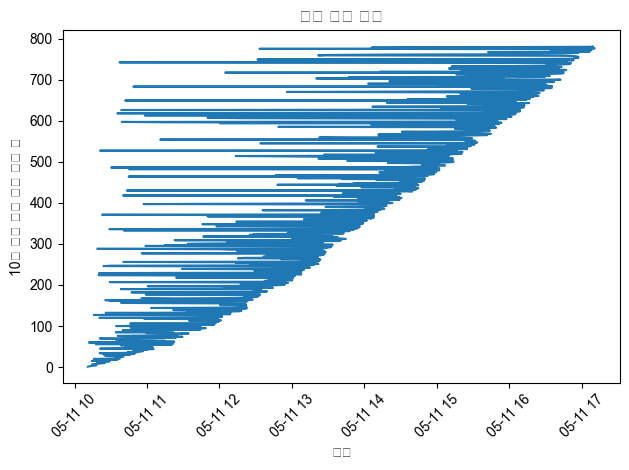

In [30]:
import csv
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def plot_signal_loss_statistics():
    csv_file_path = 'D:/장우영/LOCALSEARCH/Ship_DA/DA/data/FAmerge_20230607_1147142.csv'  # 실제 CSV 파일 경로로 대체해주세요
    insert_time_column = 'insert_time'  # INSERT_TIME 열 이름으로 대체해주세요
    sog_column = 'sog'                  # sog 열 이름으로 대체해주세요

    with open(csv_file_path, 'r') as file:
        reader = csv.DictReader(file)
        signal_loss_threshold = timedelta(minutes=10)
        signal_loss_records = {}

        previous_time = {}
        counter = 0
        signal_loss_counts = []
        time_intervals = []
        
        for row in reader:
            mmsi = row['mmsi']
            insert_time_str = row[insert_time_column]
            sog = float(row[sog_column]) if row[sog_column] else None
            
            if sog is None or sog < 3:  # sog가 없거나 3보다 작은 경우 해당 행 건너뜁니다
                continue
            
            if not insert_time_str:  # INSERT_TIME 값이 비어 있는 행 건너뜁니다
                continue

            try:
                insert_time = datetime.strptime(insert_time_str, "%Y-%m-%d %H:%M:%S")
            except ValueError:
                continue  # 잘못된 INSERT_TIME 형식인 행 건너뜁니다

            if mmsi in previous_time:
                time_diff = insert_time - previous_time[mmsi]
                if time_diff > signal_loss_threshold:
                    if mmsi not in signal_loss_records:
                        signal_loss_records[mmsi] = {
                            'start_time': previous_time[mmsi],
                            'end_time': None,
                            'recovered_time': insert_time
                        }
                        counter += 1
                        signal_loss_counts.append(counter)
                        time_intervals.append(previous_time[mmsi])
                else:
                    signal_loss_records.pop(mmsi, None)
                        
            previous_time[mmsi] = insert_time

        if signal_loss_records:
            print("선박별 10분 이상 신호 손실 시간:")
            for mmsi, record in signal_loss_records.items():
                start_time = record['start_time'].strftime("%Y-%m-%d %H:%M:%S")
                recovered_time = record['recovered_time'].strftime("%Y-%m-%d %H:%M:%S")
                print(f"MMSI: {mmsi}, 시작 시간: {start_time}, 복구 시간: {recovered_time}")
        else:
            print("10분 이상 신호 손실이 발생한 선박이 없습니다.")
        
        # 선박별로 10분 이상 신호 손실이 발생한 경우의 수를 계산합니다.

        # 통계를 그래프로 나타냅니다.
        plt.rcParams['font.family'] = 'Arial'
        plt.plot(time_intervals, signal_loss_counts)
        plt.xlabel('시간')
        plt.ylabel('10분 이상 신호 손실 발생 수')
        plt.title('신호 손실 통계')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 사용 예시
plot_signal_loss_statistics()


In [1]:
import csv
from datetime import datetime, timedelta

def calculate_total_loss_cases():
    csv_file_path = 'D:/장우영/LOCALSEARCH/Ship_DA/DA/data/FAmerge_20230607_1147142.csv'  # Replace with the actual path to your CSV file
    insert_time_column = 'insert_time'  # Replace with the column name for INSERT_TIME
    sog_column = 'sog'  # Replace with the column name for sog

    with open(csv_file_path, 'r') as file:
        reader = csv.DictReader(file)
        signal_loss_threshold = timedelta(minutes=5)
        signal_loss_records = {}

        for row in reader:
            mmsi = row['mmsi']
            insert_time_str = row[insert_time_column]
            sog = float(row[sog_column]) if row[sog_column] else None
            
            if sog is None or sog < 3:  # Skip rows where sog is missing or less than 3
                continue
            
            if not insert_time_str:  # Skip rows with empty INSERT_TIME values
                continue

            try:
                insert_time = datetime.strptime(insert_time_str, "%Y-%m-%d %H:%M:%S")
            except ValueError:
                continue  # Skip rows with invalid INSERT_TIME format

            if mmsi in signal_loss_records:
                time_diff = insert_time - signal_loss_records[mmsi]['end_time']
                if time_diff > signal_loss_threshold:
                    signal_loss_records[mmsi]['end_time'] = insert_time
                    signal_loss_records[mmsi]['count'] += 1
            else:
                signal_loss_records[mmsi] = {
                    'start_time': insert_time,
                    'end_time': insert_time,
                    'count': 1
                }
                
        if signal_loss_records:
            print("선박별 10분 이상 신호 손실 건수:")
            for mmsi, record in signal_loss_records.items():
                count = record['count']
                print(f"MMSI: {mmsi}, 손실 건수: {count}")
        else:
            print("10분 이상 신호 손실이 발생한 선박이 없습니다.")

# Usage example
calculate_total_loss_cases()


선박별 10분 이상 신호 손실 건수:
MMSI: 440051540, 손실 건수: 3
MMSI: 538010219, 손실 건수: 10
MMSI: 440102990, 손실 건수: 3
MMSI: 440048210, 손실 건수: 7
MMSI: 563156900, 손실 건수: 35
MMSI: 440148750, 손실 건수: 2
MMSI: 440314810, 손실 건수: 14
MMSI: 373595000, 손실 건수: 21
MMSI: 440134620, 손실 건수: 23
MMSI: 440111190, 손실 건수: 21
MMSI: 231865000, 손실 건수: 9
MMSI: 538009542, 손실 건수: 7
MMSI: 352001904, 손실 건수: 16
MMSI: 440117010, 손실 건수: 13
MMSI: 440113060, 손실 건수: 45
MMSI: 440000390, 손실 건수: 8
MMSI: 440106680, 손실 건수: 28
MMSI: 352002579, 손실 건수: 66
MMSI: 440401980, 손실 건수: 1
MMSI: 477157700, 손실 건수: 10
MMSI: 441107000, 손실 건수: 34
MMSI: 574004130, 손실 건수: 39
MMSI: 440709800, 손실 건수: 14
MMSI: 440147110, 손실 건수: 25
MMSI: 440134750, 손실 건수: 10
MMSI: 441629000, 손실 건수: 2
MMSI: 440875000, 손실 건수: 15
MMSI: 440003510, 손실 건수: 12
MMSI: 440800066, 손실 건수: 17
MMSI: 440061780, 손실 건수: 20
MMSI: 440036020, 손실 건수: 35
MMSI: 538002591, 손실 건수: 35
MMSI: 372765000, 손실 건수: 29
MMSI: 371007000, 손실 건수: 14
MMSI: 440204730, 손실 건수: 8
MMSI: 273421500, 손실 건수: 10
MMSI: 636015607, 

In [34]:
import csv
from datetime import datetime, timedelta


# 총 손실 사례를 계산
def calculate_total_loss_cases():
    csv_file_path = 'D:/장우영/LOCALSEARCH/Ship_DA/DA/data/FAmerge_20230607_1147142.csv'  # Replace with the actual path to your CSV file
    insert_time_column = 'insert_time'  # Replace with the column name for INSERT_TIME
    sog_column = 'sog'  # Replace with the column name for sog

    # 파일 열기
    with open(csv_file_path, 'r') as file:
        reader = csv.DictReader(file)
        signal_loss_threshold = timedelta(minutes=10)
        # 신호 손실 레코드와 고유한 MMSI 값을 각각 저장하기 위해 
        signal_loss_records = {}
        mmsi_set = set()

        for row in reader:
            mmsi = row['mmsi']
            insert_time_str = row[insert_time_column]
            sog = float(row[sog_column]) if row[sog_column] else None
            
            if sog is None or sog < 3:  # 값 sog이 없거나 3보다 작으면 행을 건너뜁니다.
                continue
            
            if not insert_time_str:  # 값이 비어 있으면 insert_time행을 건너뜁니다.
                continue

            try:
                insert_time = datetime.strptime(insert_time_str, "%Y-%m-%d %H:%M:%S")
            except ValueError:
                continue  # Skip rows with invalid INSERT_TIME format


            # 현재 insert_time와 이전 사이의 시간 차이가 end_time계산됩니다.    
            if mmsi in signal_loss_records:
                time_diff = insert_time - signal_loss_records[mmsi]['end_time']
                if time_diff > signal_loss_threshold:
                    signal_loss_records[mmsi]['end_time'] = insert_time
                    signal_loss_records[mmsi]['count'] += 1
                    if signal_loss_records[mmsi]['count'] >= 3:
                        mmsi_set.add(mmsi)
            else:
                signal_loss_records[mmsi] = {
                    'start_time': insert_time,
                    'end_time': insert_time,
                    'count': 1
                }
                
        if signal_loss_records:
            print("선박별 10분 이상 신호 손실 건수 (3회 이상):")
            for mmsi, record in signal_loss_records.items():
                count = record['count']
                if count >= 3 and mmsi in mmsi_set:
                    print(f"MMSI: {mmsi}, 손실 건수: {count}")
            total_coefficient = sum(signal_loss_records[mmsi]['count'] for mmsi in mmsi_set)
            print(f"3회 이상 손실 발생 선박들의 총 계수: {total_coefficient}")
        else:
            print("10분 이상 신호 손실이 발생한 선박이 없습니다.")

# Usage example
calculate_total_loss_cases()


선박별 10분 이상 신호 손실 건수 (3회 이상):
MMSI: 538010219, 손실 건수: 6
MMSI: 440048210, 손실 건수: 4
MMSI: 563156900, 손실 건수: 18
MMSI: 440314810, 손실 건수: 8
MMSI: 373595000, 손실 건수: 11
MMSI: 440134620, 손실 건수: 13
MMSI: 440111190, 손실 건수: 12
MMSI: 231865000, 손실 건수: 5
MMSI: 538009542, 손실 건수: 4
MMSI: 352001904, 손실 건수: 9
MMSI: 440117010, 손실 건수: 7
MMSI: 440113060, 손실 건수: 27
MMSI: 440000390, 손실 건수: 5
MMSI: 440106680, 손실 건수: 15
MMSI: 352002579, 손실 건수: 35
MMSI: 477157700, 손실 건수: 6
MMSI: 441107000, 손실 건수: 18
MMSI: 574004130, 손실 건수: 25
MMSI: 440709800, 손실 건수: 7
MMSI: 440147110, 손실 건수: 16
MMSI: 440134750, 손실 건수: 6
MMSI: 440875000, 손실 건수: 9
MMSI: 440003510, 손실 건수: 7
MMSI: 440800066, 손실 건수: 12
MMSI: 440061780, 손실 건수: 11
MMSI: 440036020, 손실 건수: 20
MMSI: 538002591, 손실 건수: 18
MMSI: 372765000, 손실 건수: 16
MMSI: 371007000, 손실 건수: 8
MMSI: 440204730, 손실 건수: 5
MMSI: 273421500, 손실 건수: 5
MMSI: 636015607, 손실 건수: 9
MMSI: 440133310, 손실 건수: 5
MMSI: 440147120, 손실 건수: 10
MMSI: 440052720, 손실 건수: 8
MMSI: 636015562, 손실 건수: 19
MMSI: 440135830, 손

In [4]:
from urllib.request import urlopen

# https://apihub.kma.go.kr/api/typ01/url/kma_buoy.php?tm=202306161610&stn=21229&help=1&authKey=cJGQY1PQTnuRkGNT0H57zQ
domain = "https://apihub.kma.go.kr/api/typ01/url/kma_buoy.php?"
tm  = "tm=202306161610&"
stn_id ="stn=21229&"
option = "help=1&authKey=cJGQY1PQTnuRkGNT0H57zQ"
auth = ""

url = domain +tm +stn_id +option + auth

with urlopen(url) as f:
    
    html = f.read()
    print(html)

b'#START7777\n#--------------------------------------------------------------------------------------------------\r\n#  \xb1\xe2\xbb\xf3\xc3\xbb BUOY \xb0\xfc\xc3\xf8\xc0\xda\xb7\xe1 [\xc0\xd4\xb7\xc2\xc0\xce\xbc\xf6\xc7\xfc\xc5\xc2][\xbf\xb9] ?tm=201001051200&stn=22101&help=1\r\n#                      \xbf\xe4\xc3\xbb\xc7\xd1 \xbd\xc3\xb0\xa3\xbf\xa1\xbc\xad -59\xba\xd0 ~ 00\xba\xd0 \xbb\xe7\xc0\xcc\xc0\xc7 \xc0\xda\xb7\xe1\xb8\xa6 \xb8\xf0\xb5\xce \xc7\xa5\xc3\xe2\r\n#                      stn=0 \xc0\xcc\xb0\xc5\xb3\xaa \xbe\xf8\xc0\xb8\xb8\xe9, \xc0\xfc\xc3\xbc \xc1\xf6\xc1\xa1 \xc7\xa5\xc3\xe2\r\n#--------------------------------------------------------------------------------------------------\r\n#  1. TM      : \xb0\xfc\xc3\xf8\xbd\xc3\xb0\xa3 (KST)\r\n#  2. STN     : BUOY \xc1\xf6\xc1\xa1 ID\r\n#  3. WD1     : \xbc\xbe\xbc\xad1\xc0\xc7 \xc7\xb3\xc7\xe2 (degree)\r\n#  4. WS1     : \xbc\xbe\xbc\xad1\xc0\xc7 \xc7\xb3\xbc\xd3 (m/s)\r\n#  5. WS1_GST : \xbc\xbe\xbc\xad1\xc0\xc7 GUST \